In [2]:
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [45]:
import seaborn as sns 

In [5]:
!pip install pandas-datareader
from pandas_datareader import data, wb

https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

In [5]:
import os

In [24]:
os.getcwd() #current working directory

'C:\\Users\\JIIN\\OneDrive\\Documents\\Github\\2021_Python\\Py_DS_ML_Bootcamp-master\\Refactored_Py_DS_ML_Bootcamp-master'

In [50]:
df = pd.read_pickle('.\\10-Data-Capstone-Projects\\all_banks')

In [51]:
df.head(1)

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   

Bank Ticker           ...     MS                                 WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume  Open   High   
Date                  ...                                                     
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.6  31.98   

Bank Ticker                        
Stock Info    Low Close    Volume  
Date                               
2006-01-03   31.2  31.9  11016400  

[1 rows x 30 columns]

- Bank of America
- CitiGroup
- Goldman Sachs
- JPMorgan Chase
- Morgan Stanley
- Wells Fargo

In [4]:
# data from Jan 1st 2006 to Jan 1st 2016 : set datetime 
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [8]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [10]:
# Could also do this for a Panel Object
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)

In [16]:
# create a list of the ticker symbols 
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [12]:
df.head()

Attributes  Adj Close                                                \
Symbols           BAC           C          GS        JPM         MS   
Date                                                                  
2006-01-03  34.425114  376.303406  105.273788  26.974699  36.786667   
2006-01-04  34.059509  369.355927  103.819702  26.818987  36.811905   
2006-01-05  34.103382  371.188354  103.778839  26.900234  36.912865   
2006-01-06  34.052204  371.188354  105.249245  27.089762  36.950710   
2006-01-09  34.074108  369.432373  106.515495  27.529747  37.341850   

Attributes                 Close                                     ...  \
Symbols           WFC        BAC           C          GS        JPM  ...   
Date                                                                 ...   
2006-01-03  20.658106  47.080002  492.899994  128.869995  40.189999  ...   
2006-01-04  20.418499  46.580002  483.799988  127.089996  39.619999  ...   
2006-01-05  20.395836  46.639999  486.200012  127.040001  39.740002  ...   
2006-01-06  20.515644  46.570000  486.200012  128.839996  40.020000  ...   
2006-01-09  20.512400  46.599998  483.899994  130.389999  40.669998  ...   

Attributes        Open                                       Volume  \
Symbols             GS        JPM         MS        WFC         BAC   
Date                                                                  
2006-01-03  126.699997  39.830002  57.169998  31.600000  16296700.0   
2006-01-04  127.349998  39.779999  58.700001  31.799999  17757900.0   
2006-01-05  126.000000  39.610001  58.549999  31.500000  14970700.0   
2006-01-06  127.290001  39.919998  58.770000  31.580000  12599800.0   
2006-01-09  128.500000  39.880001  58.630001  31.674999  15619400.0   

Attributes                                                           
Symbols             C         GS         JPM         MS         WFC  
Date                                                                 
2006-01-03  1537600.0  6188700.0  12838600.0  5377000.0  11016400.0  
2006-01-04  1870960.0  4861600.0  13491500.0  7977800.0  10870000.0  
2006-01-05  1143160.0  3717400.0   8109400.0  5778000.0  10158000.0  
2006-01-06  1370210.0  4319600.0   7966900.0  6889800.0   8403800.0  
2006-01-09  1680740.0  4723500.0  16575200.0  4144500.0   5619600.0  

[5 rows x 36 columns]

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [19]:
# axis = 1 column append | default는 row append
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1, keys = tickers) 

In [21]:
bank_stocks.head(2)

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  34.425114   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.059509   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   

                                                WFC                     \
                Close     Volume  Adj Close    High     Low       Open   
Date                                                                     
2006-01-03  58.310001  5377000.0  36.786667  31.975  31.195  31.600000   
2006-01-04  58.349998  7977800.0  36.811905  31.820  31.365  31.799999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.658106  
2006-01-04  31.530001  10870000.0  20.418499  

[2 rows x 36 columns]

# EDA

* documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).

In [52]:
# Column index : MultiIndex
df.columns

MultiIndex(levels=[['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'], ['Open', 'High', 'Low', 'Close', 'Volume']],
           codes=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5], [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]],
           names=['Bank Ticker', 'Stock Info'])

In [53]:
# multi index columns name 지정
df.columns.names = ['Bank Ticker', 'Stock Info']

In [54]:
df.columns.names

FrozenList(['Bank Ticker', 'Stock Info'])

In [55]:
# max close price for each bank
df.xs(key='Close', axis=1, level = 'Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

- Percentage change between the current and a prior element. : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pct_change.html
- Return defined by $$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [56]:
# returns for each bank's stock : returns = 
returns = pd.DataFrame()
for  i in tickers :
    returns[i+' Return'] = df[i]['Close'].pct_change()
returns.head() 

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


In [57]:
# Prior없는 start date NaN 
returns.iloc[0,:]

BAC Return   NaN
C Return     NaN
GS Return    NaN
JPM Return   NaN
MS Return    NaN
WFC Return   NaN
Name: 2006-01-03 00:00:00, dtype: float64

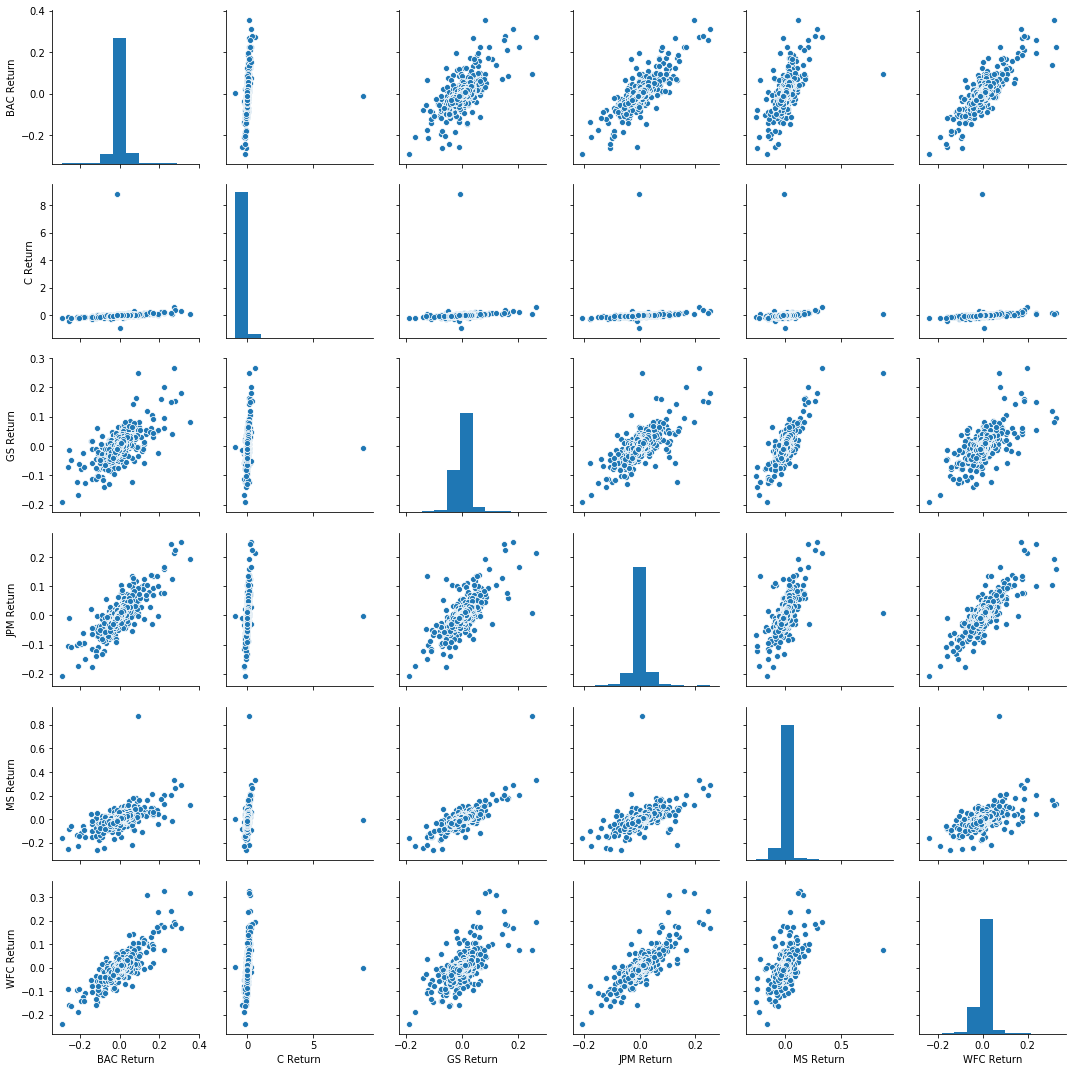

In [58]:
# Pairplot 
sns.pairplot(returns[1:], diag_kind ='hist', diag_kws = {'bins':10})

In [59]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]